# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
import metpy.calc as mcalc
from metpy.plots import SkewT
from metpy.units import units   
import xarray as xr
from palettable.cartocolors.qualitative import Prism_8
prism = Prism_8.mpl_colors
blue = prism[1]
green = prism[3]
purple = prism[0]
red = prism[7]
yellow = prism[5]
orange = prism[6]
teal = prism[2]

char = 'abcdefg'

colors = [blue,red,yellow,green,purple,orange]

import matplotlib as mpl
from run_params import alt


/home/gleung/miniconda3/envs/aerograd/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
import cartopy
import cartopy.crs as ccrs
from shapely import geometry
import metpy.calc as mpcalc


In [3]:
style = '/home/gleung/scripts/styles/bee-paperlight.mplstyle'
plt.style.use(style)

import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# Add every font at the specified location
font_dir = ['/home/gleung/scripts/futura']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams['font.family'] = 'Futura'
rcParams["figure.facecolor"] = 'white'
rcParams['figure.dpi'] = 300  

# Process ERA

## Midlatitude

In [ ]:
dataPath = f"/camp2e/gleung/aerograd/mid/"

paths = [f"{dataPath}{p}" for p in sorted(os.listdir(dataPath)) if (p.endswith('grib'))]

print(paths)
ds = xr.open_mfdataset(paths, engine='cfgrib')

sub = ds.sel(latitude=slice(37,35), longitude=slice(-86,-84))
sub = sub.groupby('isobaricInhPa').mean(...)
era = sub[['t','q']].to_dataframe()[['t','q']]

era.to_pickle("/camp2e/gleung/aerograd/skewt-midlat.pkl")


sub = sub.groupby('isobaricInhPa').mean(...)
era = sub[['t','q']].to_dataframe()[['t','q']]

In [ ]:
dataPath = f"/camp2e/gleung/aerograd/tropics/"

paths = [f"{dataPath}{p}" for p in sorted(os.listdir(dataPath)) if (p.endswith('grib'))]

print(paths)
ds = xr.open_mfdataset(paths, engine='cfgrib')

sub = ds.sel(latitude=slice(17.5,15.5), longitude=slice(120,122))
sub = sub.groupby('isobaricInhPa').mean(...)
era = sub[['t','q']].to_dataframe()[['t','q']]

era.to_pickle("/camp2e/gleung/aerograd/skewt-tropics.pkl")


# Print for RAMS

In [ ]:
ver = 'midlat'

era = pd.read_pickle(f"/camp2e/gleung/aerograd/skewt-{ver}.pkl")
  
pressures = np.arange(10, 1010, 10)

print(len(pressures))

d = pd.DataFrame([np.interp(pressures,era.index, era[v]) for v in ['t','q','u','v']]).T
d.index = pressures
d.columns = ['t','q','u','v']

for i in range(len(d)//8+1):
    if i ==0:
        print(f"   PS = ", ",".join([f"{v:.2f}" for v in d.index[::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{v:.2f}" for v in d.index[::-1].values[i*8:(i+1)*8]])+",")
print()
for i in range(len(d)//8+1):
    if i ==0:
        print(f"   TS = ", ",".join([f"{v:.2f}" for v in d['t'][::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{v:.2f}" for v in d['t'][::-1].values[i*8:(i+1)*8]])+",")
print()        
for i in range(len(d)//8+1):
    if i ==0:
        print(f"   RTS = ", ",".join([f"{v*1000:.3f}" for v in d['q'][::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{v*1000:.3f}" for v in d['q'][::-1].values[i*8:(i+1)*8]])+",")
print()
for i in range(len(d)//8+1):
    if i ==0:
        print(f"   US = ", ",".join([f"{0:.2f}" for v in d['u'][::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{0:.2f}" for v in d['u'][::-1].values[i*8:(i+1)*8]])+",")
print()        
for i in range(len(d)//8+1):
    if i ==0:
        print(f"   VS = ", ",".join([f"{0:.2f}" for v in d['v'][::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{0:.2f}" for v in d['v'][::-1].values[i*8:(i+1)*8]])+",")
print(len(d))

# Plot Figure Methods

In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def latlon(ax):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = False
    gl.ylines = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

In [ ]:
data = xr.open_dataset(f"/camp2e/gleung/aerograd/grad.1000/a-L-2019-09-16-000000-g1.h5")[['CCCMP']]
gprof = data.sel(phony_dim_1=500, phony_dim_0=500).CCCMP.data
gprof0 = data.sel(phony_dim_1=0, phony_dim_0=0).CCCMP.data
data = data.sel(phony_dim_2=1)
data = data.CCCMP.data.T

ndata = xr.open_dataset(f"/camp2e/gleung/aerograd/nograd.1000/a-L-2019-09-16-000000-g1.h5")[['CCCMP']]
nprof = ndata.sel(phony_dim_1=500, phony_dim_0=500).CCCMP.data
ndata = ndata.sel(phony_dim_2=1)
ndata = ndata.CCCMP.data.T
print(data)

/tmp/ipykernel_24382/2415579609.py:50: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.arange(0,100,0.1),
/tmp/ipykernel_24382/2415579609.py:59: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax2.pcolormesh(np.arange(0,100,0.1),
/tmp/ipykernel_24382/2415579609.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f"/camp2e/gleung/aerograd-figures/SetUp-2.png", b

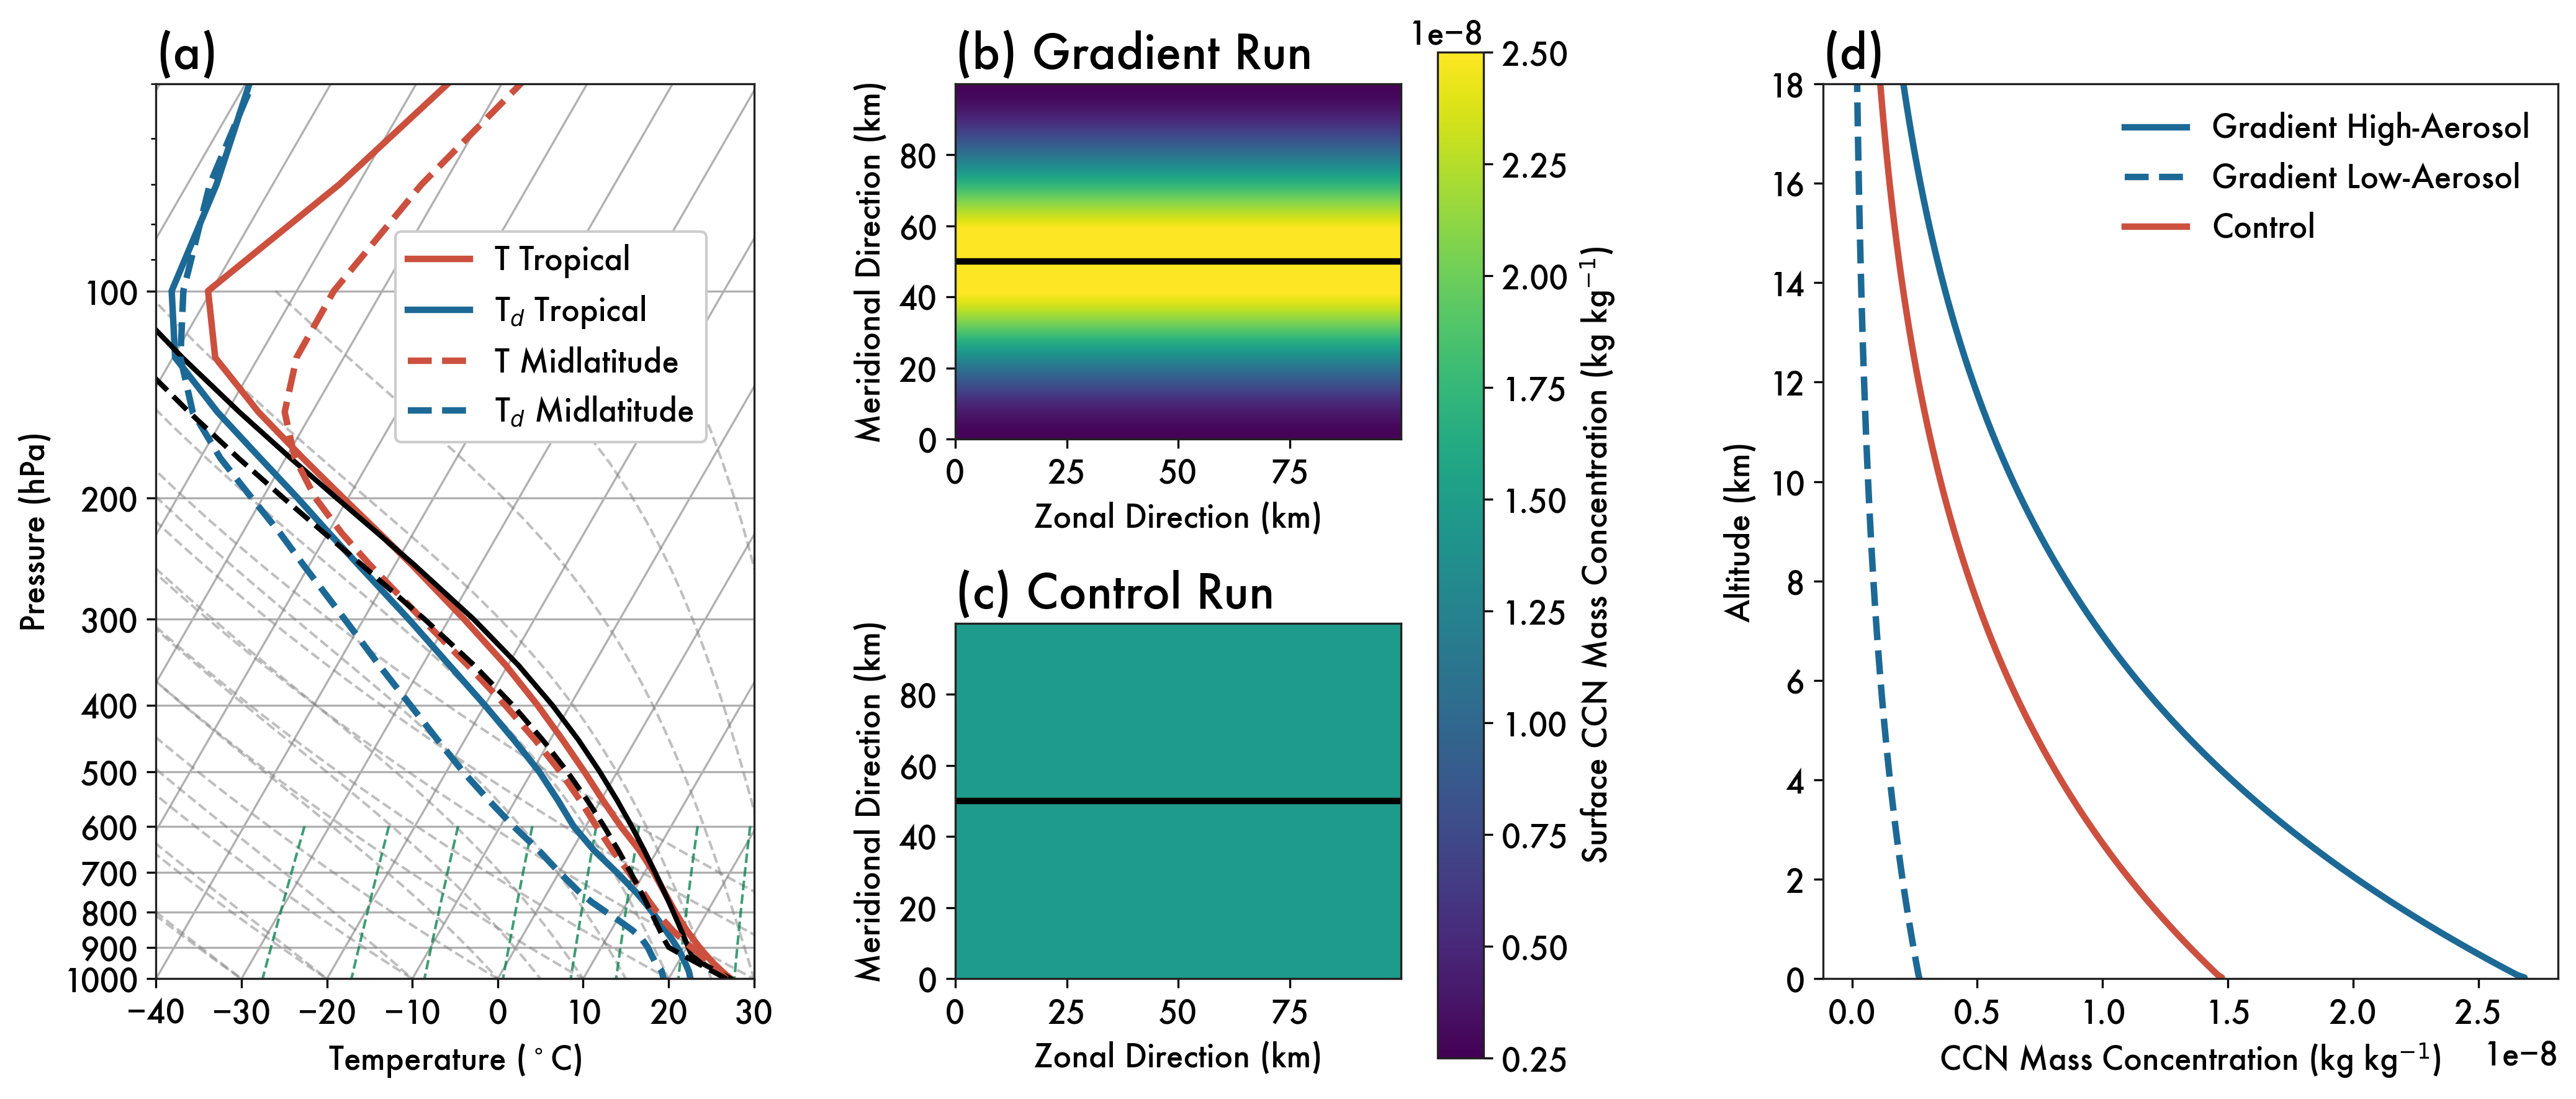

In [ ]:
import cartopy
import cartopy.crs as ccrs
from shapely import geometry
import metpy.calc as mpcalc

fig = plt.figure(figsize=(14,6))
gs = gridspec.GridSpec(4,9)

skew = SkewT(fig, rotation=30, subplot=gs[:, :3])
ax = fig.add_subplot(gs[:2,3:5])
ax2 = fig.add_subplot(gs[2:,3:5])
ax3 = fig.add_subplot(gs[:,6:])

for ver, ls, name in zip(['tropics','midlat'],['-','--'],['Tropical', 'Midlatitude']):
  era = pd.read_pickle(f"/camp2e/gleung/aerograd/skewt-{ver}.pkl")
  p = era.index.values * units.hPa
  q = era.q.values
  T = era.t.values * units.kelvin
  Td = mcalc.dewpoint_from_specific_humidity(p,T,q)
  skew.ax.set_title('(a)')
  skew.plot(p, T,color=red, label = f'T {name}', ls = ls)
  skew.plot(p, Td,color=blue, label=f'T$_d$ {name}', ls=ls)

  prof = mpcalc.parcel_profile(p[::-1], T[::-1][0], Td[::-1][0]).to('degC')
  skew.plot(p[::-1], prof, 'black', ls=ls, lw=2)

skew.plot_dry_adiabats(colors='gray', lw=1)
skew.plot_moist_adiabats(colors='gray', lw=1)
skew.plot_mixing_lines(colors=green, lw=1)

skew.ax.legend(loc=(0.4,0.6),
              facecolor='white', framealpha=1, frameon=True)
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_xlabel('Temperature ($^\circ$C)')
skew.ax.set_xlim(-40,30)
skew.ax.set_ylim(1000,50)

'''ax.coastlines()

geom = geometry.box(minx=120,maxx=122,miny=15.5,maxy=17.5)
    
ax.add_geometries([geom],crs=ccrs.PlateCarree(), facecolor='white', edgecolor='black', lw=3)

latlon(ax)
ax.set_title('(b)')
ax.set_extent([110,130,2.5,25])'''

ax.set_title('(b) Gradient Run')

ax.pcolormesh(np.arange(0,100,0.1),
                np.arange(0,100,0.1),
                data.T,
              vmax = 2.5e-08, vmin=2.5e-09)
ax.set_xlabel('Zonal Direction (km)')
ax.set_ylabel('Meridional Direction (km)')

ax2.set_title('(c) Control Run')

c = ax2.pcolormesh(np.arange(0,100,0.1),
                np.arange(0,100,0.1),
                ndata.T, 
                   vmax = 2.5e-08, vmin=2.5e-09)

ax2.set_xlabel('Zonal Direction (km)')
ax2.set_ylabel('Meridional Direction (km)')

ax.axhline(50,color='black')
ax2.axhline(50,color='black')

cax = fig.add_axes([ax.get_position().x1 + 0.015, 
                       ax2.get_position().y0,
                       0.0175,
                       ax.get_position().y1 - ax2.get_position().y0])
plt.colorbar(c,cax=cax,
            label = 'Surface CCN Mass Concentration (kg kg$^{-1}$)')

ax3.plot(gprof, alt/1000, color=blue, label = 'Gradient High-Aerosol')
ax3.plot(gprof0, alt/1000, color=blue, ls='--', label = 'Gradient Low-Aerosol')
ax3.plot(nprof, alt/1000, color=red, label = 'Control')

ax3.set_ylim(0,18)
ax3.set_ylabel('Altitude (km)')
ax3.set_xlabel('CCN Mass Concentration (kg kg$^{-1}$)')
ax3.legend()
ax3.set_title('(d)')

plt.savefig(f"/camp2e/gleung/aerograd-figures/SetUp-2.png", bbox_inches='tight', dpi=300)
plt.show()